In [1]:
# import all the libraries we are going to use
import pandas as pd
import geopandas as gpd
import shapely

# plotting configuration
import matplotlib.pyplot as plt
# Geoviews
#import geoviews as gv
#import hvplot.pandas

%matplotlib inline

In [2]:
# First thing to note is that many geospatial python packages are under active development
# and updated regularly. So the version you're using today will likely be updated in the near 
# future!
print('Pandas version: ', pd.__version__) #0.24.2
print('Geopandas version: ', gpd.__version__) #0.5.0

Pandas version:  0.24.2
Geopandas version:  0.4.1


In [4]:
transit_shp = gpd.read_file('../data/TransitStops/TransitStops.shp')
transit_shp.head()

,Agency,StopID,StopName,Routes,LastUpdate,geometry
0,asotin,12177,Lewiston Community Center,Blue Line 1;Blue Line 2,2014-09-16,POINT (2519654.855670556 414714.8806623966)
1,asotin,12178,Dshs,Red Line 1;Red Line 2;Green Line 1;Green Line ...,2014-09-16,POINT (2511682.108164638 415185.0470448881)
2,asotin,12179,Walmart,Red Line 1;Red Line 2;Green Line 2;Blue Line 1...,2014-09-16,POINT (2510713.500193715 415974.8420532197)
3,asotin,12180,Ptba Office,Red Line 1,2014-09-16,POINT (2505479.838416964 414603.8434828967)
4,asotin,12181,Sonary Crest,Red Line 1,2014-09-16,POINT (2502934.010175303 402119.4065095633)


In [5]:
census_bgs = gpd.read_file('../data/block-groups/block-groups.shp')
census_bgs.head()

,fips_code,geometry
0,530330001001,"POLYGON ((-122.289753 47.733732, -122.285957 4..."
1,530330001002,"POLYGON ((-122.296527 47.730149, -122.292313 4..."
2,530330001003,"POLYGON ((-122.292266 47.726474, -122.28956 47..."
3,530330001004,"POLYGON ((-122.29652 47.733784, -122.292435 47..."
4,530330001005,"POLYGON ((-122.296406 47.726509, -122.292266 4..."


In [6]:
transit_shp.crs # {'init': 'epsg:2927'}

{'init': 'epsg:2927'}

In [7]:
census_bgs.crs # {'proj': 'longlat', 'ellps': 'GRS80', 'no_defs': True}

{'init': 'epsg:4326'}

In [8]:
# doesn't work yet
#transit_shp.crs = {'init' :'epsg:4326'}
#census_bgs.crs = {'init' :'epsg:4326'}
transit_shp = transit_shp.to_crs(census_bgs.crs)

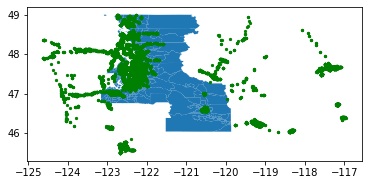

In [9]:
base = census_bgs.plot()
transit_shp.plot(ax=base, color='green', markersize=5)

In [ ]:
# doesn't work yet - need packages
#points = transit_shp.hvplot(geo=True, hover_cols=['StopName'], c='StopID', cmap='viridis', colorbar=True)
#tiles = gv.tile_sources.CartoDark(width=1000, height=500)
#tiles * points

In [10]:
test = gpd.sjoin(census_bgs, transit_shp, how='inner', op='intersects')

AttributeError: 'NoneType' object has no attribute 'bounds'